In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [153]:
os.chdir('D:\Deeksha\Data Science-Deeksha\Capstone Project')

In [154]:
a1=pd.read_excel('Preprocessed Data.xlsx')


In [155]:
def boxplot_outlier_removal(X, exclude=['']):
    '''
    remove outliers detected by boxplot (Q1/Q3 -/+ IQR*1.5)

    Parameters
    ----------
    X : dataframe
      dataset to remove outliers from
    exclude : list of str
      column names to exclude from outlier removal

    Returns
    -------
    X : dataframe
      dataset with outliers removed
    '''
    before = len(X)

    # iterate each column
    for col in X.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (X[col] > Q1 - 1.5 * IQR) & (X[col] < Q3 + 1.5 *IQR)
            X = X[filter_]

    after = len(X)
    diff = before-after
    percent = diff/before*100
    print('{} ({:.2f}%) outliers removed'.format(diff, percent))
    return X

In [156]:
exclude_list=['STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','STDNT_MINOR',
              'FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F',
              'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F','SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S',
                'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S','HOUSING_STS','RETURNED_2ND_YR',
              'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','age_group','CORE_COURSE_NAME_1_F_GROUPED',
              'CORE_COURSE_NAME_2_F_GROUPED','CORE_COURSE_NAME_3_F_GROUPED','CORE_COURSE_NAME_1_S_GROUPED',
              'CORE_COURSE_NAME_2_S_GROUPED','STDNT_AGE','RETURNED_2ND_YR','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','COST_OF_ATTEND']

data=a1

data.shape

(3400, 35)

In [157]:
boxplot_outlier_removal(data,exclude_list)

1041 (30.62%) outliers removed


,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,...,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,A,...,3,No Information,16,16,14,14,0,0,0,0.0
2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,A,...,4,Other/Unknown,15,15,14,14,0,0,0,0.0
3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,A,...,3,College/Beyond,13,13,14,14,0,0,0,0.0
4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,A,...,2,High School,12,12,12,12,835920,1355760,519840,278340.0
5,18,M,BGD 1,Y,Political Science,N,1070,2010-08,ARAB 1001,A,...,3,College/Beyond,15,15,16,16,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,19,M,BGD 3,Y,Psychology,N,990,2008-08,ECON 2106,F,...,2,High School,12,6,14,13,0,0,0,0.0
3391,18,F,BGD 1,N,Pre-Business,N,990,2010-08,ITDS 2749,F,...,3,No Information,17,6,14,13,0,0,0,0.0
3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,B,...,3,No Information,13,9,14,13,0,0,0,0.0
3398,18,F,BGD 3,Y,Joint Enrollment - Accel,N,990,2010-08,PSYC 1101,C,...,3,College/Beyond,12,9,14,13,0,269100,0,-231720.0


In [158]:
#One hot encoding for bigger variables
def on_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(df[variable]==label,1,0)

In [159]:
top_10=[x for x in data.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]

In [160]:
on_hot_top_x(data,'STDNT_MAJOR',top_10)

In [161]:
data.shape

(3400, 45)

In [162]:
top_10=[x for x in data.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]
on_hot_top_x(data,'CORE_COURSE_NAME_1_F',top_10)

In [163]:
top_10=[x for x in data.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_2_F',top_10)

data.shape

(3400, 65)

In [164]:
top_10=[x for x in data.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_3_F',top_10)
data.shape

(3400, 75)

In [165]:
top_10=[x for x in data.CORE_COURSE_NAME_1_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_1_S',top_10)
data.shape

(3400, 85)

In [166]:
top_10=[x for x in data.CORE_COURSE_NAME_2_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data,'CORE_COURSE_NAME_2_S',top_10)
data.shape

(3400, 95)

In [167]:
del_list=['STDNT_MAJOR','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S']
data.drop(del_list,axis=1)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,...,CORE_COURSE_NAME_2_S_ENGL 1102,CORE_COURSE_NAME_2_S_COMM 1110,CORE_COURSE_NAME_2_S_POLS 1101,CORE_COURSE_NAME_2_S_HIST 2111,CORE_COURSE_NAME_2_S_HIST 2112,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ARTH 1100
0,18,F,BGD 1,Y,N,1150,2007-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
1,19,F,BGD 1,N,N,1190,2008-08,A,A,A,...,1,0,0,0,0,0,0,0,0,0
2,18,M,BGD 1,Y,N,1030,2010-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
3,18,M,BGD 1,Y,N,1220,2007-08,A,A,B,...,0,0,0,0,1,0,0,0,0,0
4,18,F,BGD 1,Y,N,1190,2008-08,A,A,A,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,F,BGD 4,N,N,790,2008-08,A,B,B,...,1,0,0,0,0,0,0,0,0,0
3396,18,F,BGD 1,Y,N,950,2007-08,B,B,B,...,1,0,0,0,0,0,0,0,0,0
3397,18,F,BGD 4,Y,N,1030,2008-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0
3398,18,F,BGD 3,Y,N,990,2010-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0


In [168]:
data2=data

drop_col_final=['STDNT_GENDER','STDNT_MINOR','STDNT_TEST_ENTRANCE_COMB','DISTANCE_FROM_HOME','HIGH_SCHL_GPA','FATHER_HI_EDU_CD',
               'MOTHER_HI_EDU_CD','FIRST_TERM_ATTEMPT_HRS','GROSS_FIN_NEED','UNMET_NEED']

data2=data2.drop(drop_col_final,axis=1)

In [169]:
def subject_grade(data2,sub):
    data2[sub+'_Num']=np.where(data2[sub]=='A', 1,
                                      np.where(data2[sub]=='B', 2,
                                      np.where(data2[sub]=='C', 3,
                                      np.where(data2[sub]=='D', 4,
                                      np.where(data2[sub]=='F', 5,
                                      np.where(data2[sub]=='NOT REP', 6,
                                      np.where(data2[sub]=='INCOMPL', 7,8)))))))
    return data2

In [170]:
subject_grade(data2,'CORE_COURSE_GRADE_1_F')
subject_grade(data2,'CORE_COURSE_GRADE_2_F')
subject_grade(data2,'CORE_COURSE_GRADE_3_F')
subject_grade(data2,'CORE_COURSE_GRADE_1_S')
subject_grade(data2,'CORE_COURSE_GRADE_2_S')

,STDNT_AGE,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,...,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ARTH 1100,CORE_COURSE_GRADE_1_F_Num,CORE_COURSE_GRADE_2_F_Num,CORE_COURSE_GRADE_3_F_Num,CORE_COURSE_GRADE_1_S_Num,CORE_COURSE_GRADE_2_S_Num
0,18,BGD 1,Y,Undeclared,2007-08,ANTH 1105,A,ARTH 1100,A,ENGL 1102,...,0,0,0,0,0,1,1,1,1,1
1,19,BGD 1,N,Undeclared,2008-08,ANTH 1105,A,GERM 1002,A,ITDS 2735,...,0,0,0,0,0,1,1,1,1,1
2,18,BGD 1,Y,Mathematics,2010-08,ANTH 1105,A,ENGL 1101,A,HIST 2111,...,0,0,0,0,0,1,1,1,1,1
3,18,BGD 1,Y,Undeclared,2007-08,ANTH 1107,A,COMM 1110,A,ENGL 1101,...,0,0,0,0,0,1,1,2,1,1
4,18,BGD 1,Y,Art,2008-08,ANTH 1107,A,ARTH 1100,A,CPSC 1105,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,BGD 4,N,Music Performance,2008-08,COMM 1110,A,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,1,2,2,3,2
3396,18,BGD 1,Y,Biology,2007-08,POLS 1101,B,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,2,2,2,3,2
3397,18,BGD 4,Y,Biology,2008-08,ENGL 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2
3398,18,BGD 3,Y,Joint Enrollment - Accel,2010-08,PSYC 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2


In [171]:
data3=data2

del_final=['FIRST_TERM','SECOND_TERM','CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_1_S',
               'CORE_COURSE_GRADE_2_S','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F',
               'CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','STDNT_MAJOR']


In [172]:
data3=data3.drop(del_final,axis=1)

In [173]:
data4=pd.get_dummies(data3)

In [174]:
X=data4.drop('RETURNED_2ND_YR',axis=1)

In [175]:
y=data3['RETURNED_2ND_YR']

In [176]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [177]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [178]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
X_test_res,y_test_res=sm.fit_sample(X_test,y_test)

In [179]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [180]:
model=XGBClassifier(max_depth=2)
model.fit(X_train_res,y_train_res)

C:\Users\Deeksha Malik\nanaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
model=XGBClassifier(max_depth=2,subsample=0.8,n_estimators=800,learning_rate=0.1,min_child_weight=1,random_state=0,reg_alpha=1,reg_lambda=0)
model.fit(X_train_res,y_train_res)
y_predict=model.predict(X_test_res)
y_train_predict=model.predict(X_train_res)
from sklearn.metrics import accuracy_score,classification_report
print('Train accuracy',accuracy_score(y_train_res,y_train_predict))
print('Test accuracy',accuracy_score(y_test_res,y_predict))



[07:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy 0.9136460554371002
Test accuracy 0.8514357053682896


In [182]:
print(classification_report(y_train_res,y_train_predict))


              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1876
           1       0.87      0.97      0.92      1876

    accuracy                           0.91      3752
   macro avg       0.92      0.91      0.91      3752
weighted avg       0.92      0.91      0.91      3752



[07:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


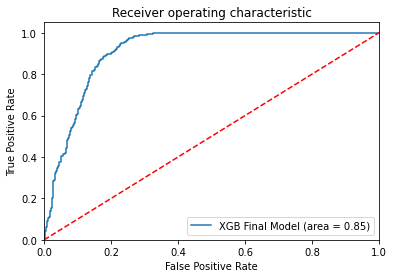

In [183]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

new = XGBClassifier(max_depth=2,subsample=0.8,n_estimators=800,learning_rate=0.1,min_child_weight=1,random_state=0,reg_alpha=1,reg_lambda=0)

new.fit(X_train_res,y_train_res)
new_roc_auc = roc_auc_score(y_test_res, new.predict(X_test_res))
fprnew, tprnew, thresholds_new = roc_curve(y_test_res, new.predict_proba(X_test_res)[:,1])

plt.figure()
plt.plot(fprnew, tprnew, label='XGB Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [184]:
imp_feat=pd.Series(new.feature_importances_,index=X.columns.tolist())

In [149]:
imp_feat

STDNT_AGE                                       0.007589
FIRST_TERM_EARNED_HRS                           0.005943
SECOND_TERM_ATTEMPT_HRS                         0.016858
SECOND_TERM_EARNED_HRS                          0.008633
COST_OF_ATTEND                                  0.005495
                                                  ...   
MOTHER_HI_EDU_DESC_College/Beyond               0.017946
MOTHER_HI_EDU_DESC_High School                  0.014024
MOTHER_HI_EDU_DESC_Middle School/Junior High    0.007015
MOTHER_HI_EDU_DESC_No Information               0.006751
MOTHER_HI_EDU_DESC_Other/Unknown                0.008446
Length: 93, dtype: float32

In [185]:
imp_feat.sort_values(ascending=False)

HOUSING_STS_On Campus             0.064904
HOUSING_STS_Off Campus            0.040311
STDNT_BACKGROUND_BGD 3            0.027502
CORE_COURSE_NAME_2_S_ENGL 1101    0.026704
STDNT_BACKGROUND_BGD 1            0.022659
                                    ...   
CORE_COURSE_NAME_2_F_MUSC 1100    0.003186
CORE_COURSE_NAME_1_F_ECON 2106    0.002176
STDNT_BACKGROUND_BGD 5            0.000000
STDNT_BACKGROUND_BGD 7            0.000000
STDNT_BACKGROUND_BGD 8            0.000000
Length: 93, dtype: float32

<AxesSubplot:>

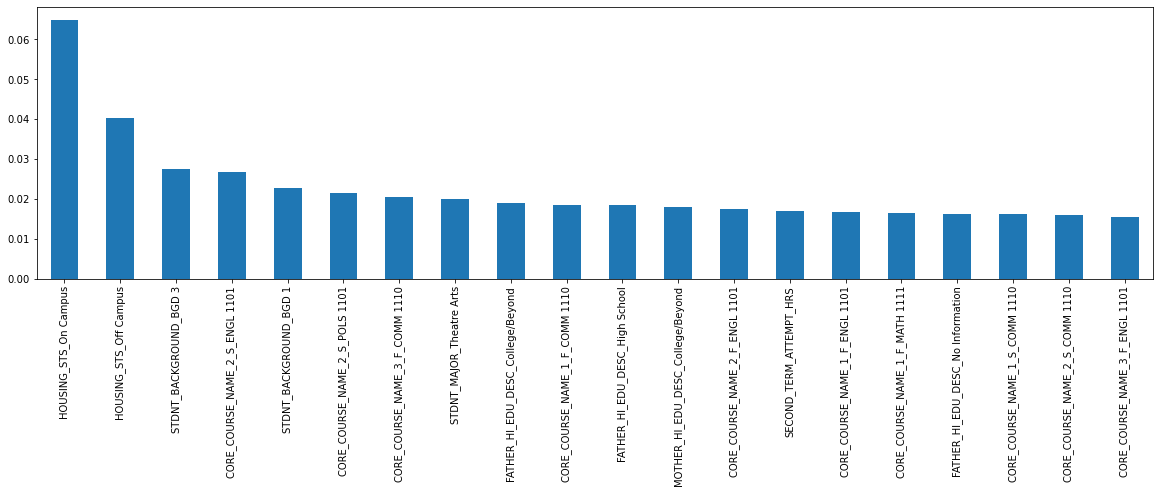

In [186]:
imp_feat.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(20,5))